# Playing with and understanding the patient data.

First we need to import the libraries and load the data in.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

patient_df = pd.read_csv('medical_data.csv')
patient_df.head()

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk


In [2]:
patient_df.shape

(1520, 11)

In [3]:
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 11 columns):
Random          1520 non-null float64
Id              1520 non-null int64
Indication      1517 non-null object
Diabetes        1518 non-null object
IHD             1520 non-null object
Hypertension    1517 non-null object
Arrhythmia      1520 non-null object
History         1518 non-null object
IPSI            1516 non-null float64
Contra          1520 non-null object
label           1517 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 130.8+ KB


In [4]:
patient_df.describe(include='all')

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
count,1520.000000,1520.000000,1517,1518,1520,1517,1520,1518,1516.000000,1520,1517
unique,NaN,NaN,5,2,2,2,2,2,NaN,41,3
top,NaN,NaN,A-F,no,no,no,no,no,NaN,100,NoRisk
freq,NaN,NaN,493,1441,801,784,1190,1494,NaN,244,1008
mean,0.509545,188365.022368,NaN,NaN,NaN,NaN,NaN,NaN,78.872032,NaN,NaN
std,0.284006,64355.870242,NaN,NaN,NaN,NaN,NaN,NaN,10.162351,NaN,NaN
min,0.000295,78261.000000,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN
25%,0.268531,137130.750000,NaN,NaN,NaN,NaN,NaN,NaN,73.000000,NaN,NaN
50%,0.517616,191344.500000,NaN,NaN,NaN,NaN,NaN,NaN,77.000000,NaN,NaN
75%,0.754724,244559.500000,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,NaN,NaN


# Inconcistancy in the given data

The analysis write up doc can be found on the drive.

In [5]:
patient_df['Indication'].unique()

array(['A-F', 'TIA', 'CVA', 'ASx', 'Asx', nan], dtype=object)

In [6]:
patient_df['label'].unique()

array(['NoRisk', 'Risk', 'Unknown', nan], dtype=object)

Those values will be cleaned in the later stage.

In [7]:
patient_df.corr()

,Random,Id,IPSI
Random,1.000000,0.051493,-0.039069
Id,0.051493,1.000000,-0.044004
IPSI,-0.039069,-0.044004,1.000000


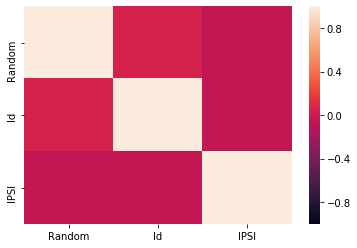

In [8]:
sns.heatmap(patient_df.corr(), vmin=-1, vmax=1)

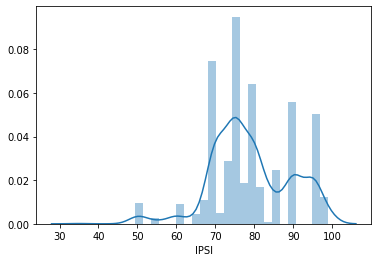

In [9]:
x = patient_df["IPSI"].dropna() #get the IPSI series and remove all the Nan values
ax = sns.distplot(x)

### Making sure IPSI doesn't contain extra info 

In [10]:
total = 0
num_len = 0
for val in patient_df['IPSI']:
    if (len(str(val)) > num_len):
        num_len = len(str(val))
    if (str(val)[-1] != '0'):
        print (val)
print(num_len)

nan
nan
nan
nan
4


This greenlights its conversion to int. I.e. IPSI can be changed to int for visualization and performance increase

Making sure Diabetes contains proper values

In [11]:
patient_df['Diabetes'].value_counts()

my_df = patient_df['Diabetes'].astype('str')
my_df = my_df[my_df != 'yes']
my_df = my_df[my_df != 'no']

In [12]:
patient_df['IPSI'].isnull().value_counts()

False    1516
True        4
Name: IPSI, dtype: int64

In [13]:
patient_df[patient_df['Contra'].isnull()]

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label


### Making sure the numerical attributes are within their allowed ranges.

In [14]:
s = pd.to_numeric(patient_df['Contra'], downcast='integer', errors='coerce')
s.isnull().value_counts()

for num in s:
    if (num < 0 or num > 100):
        print(num)
        
s = patient_df['IPSI']

for num in s:
    if (num < 0 or num > 100):
        print(num)

### Making sure random only contains unique values

In [15]:
repeated_count = 0

for num in patient_df['Random'].value_counts():
    if (num > 1):
        repeated_count += 1
        
print("There are {} values that repeat".format(repeated_count))


There are 273 values that repeat


Random is not a unique collumn like is described in the data dictionary!

### Making sure random is whitin its allowed range

In [16]:
for num in patient_df['Random']:
    if (num < 0 or num > 1):
        print("Oh no.")

# Cleaning the Data

### Imputing null values with median

In [17]:
cleaned_df = patient_df.copy()

for col in patient_df.columns.values:
    cleaned_df[col].replace(cleaned_df[col].median, np.NaN)

### Removing all the rows containing null vals.

This cell is only here for archival purposes. The initial data used for the model prototypes was not imputted.

In [18]:
cleaned_df = patient_df.copy()
series = []

for col in patient_df.columns.values:
    cleaned_df = cleaned_df[cleaned_df[col].notnull()]
    
cleaned_df.head()

cleaned_df.shape

(1503, 11)

### Further cleaning

In [19]:
cleaned_df.loc[(cleaned_df.Indication == 'Asx'), 'Indication'] = 'ASX'
cleaned_df.loc[(cleaned_df.Indication == 'ASx'), 'Indication'] = 'ASX'
        
cleaned_df['Indication'].value_counts()

A-F    489
CVA    408
TIA    388
ASX    218
Name: Indication, dtype: int64

In [20]:
cleaned_df = cleaned_df[cleaned_df['label'] != 'Unknown']
cleaned_df['label'].value_counts()

NoRisk    1001
Risk       500
Name: label, dtype: int64

In [21]:
cleaned_df.shape

(1501, 11)

Changing attribute types for visualization and potential performance increase

In [22]:
s = pd.to_numeric(cleaned_df['Contra'], downcast='integer', errors='coerce')
#s = s[s.notnull()]
cleaned_df.drop('Contra', axis=1, inplace=True)
cleaned_df = pd.concat([cleaned_df, s], axis=1)

Removing the rows with nan contra values

In [23]:
cleaned_df = cleaned_df[cleaned_df['Contra'].notnull()]
cleaned_df.shape

(1500, 11)

In [24]:
cleaned_df['Contra'].mean()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1519
Data columns (total 11 columns):
Random          1500 non-null float64
Id              1500 non-null int64
Indication      1500 non-null object
Diabetes        1500 non-null object
IHD             1500 non-null object
Hypertension    1500 non-null object
Arrhythmia      1500 non-null object
History         1500 non-null object
IPSI            1500 non-null float64
label           1500 non-null object
Contra          1500 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 140.6+ KB


In [25]:
cleaned_df.corr()

,Random,Id,IPSI,Contra
Random,1.000000,0.053657,-0.040428,-0.041128
Id,0.053657,1.000000,-0.047948,-0.077768
IPSI,-0.040428,-0.047948,1.000000,0.317034
Contra,-0.041128,-0.077768,0.317034,1.000000


 contra contains some empty strings. Only more reason to convert it to an integer.

So 19 rows were removed from the DataFrame

# Visualizations

This will include graphs such as box plots, scatter graphs, histograms and distribution graphs. They will be perfomed on the cleaned data.

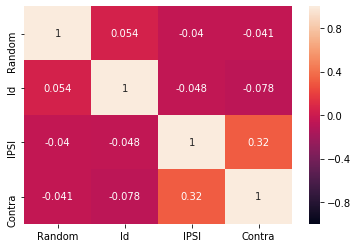

In [26]:
sns.heatmap(cleaned_df.corr(), vmin=-1, vmax=1, annot=True)

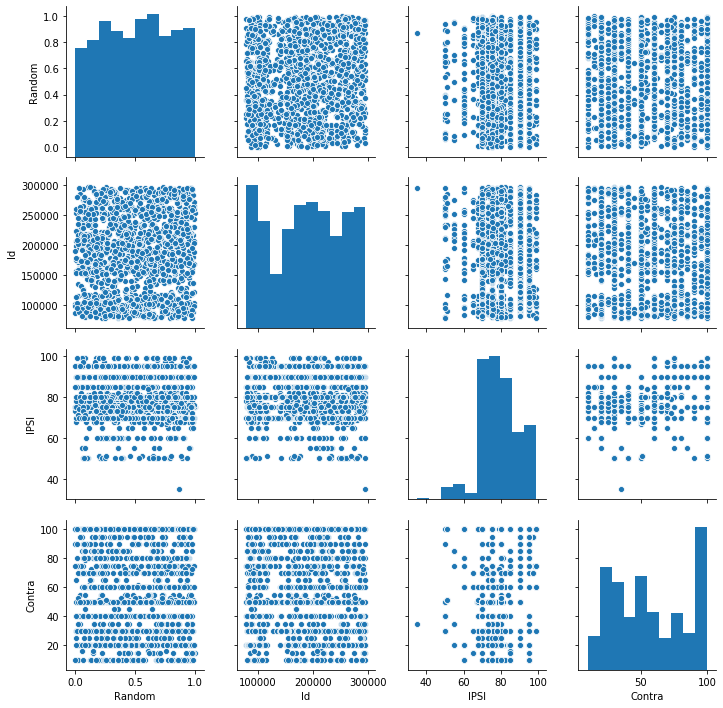

In [27]:
sns.pairplot(cleaned_df)

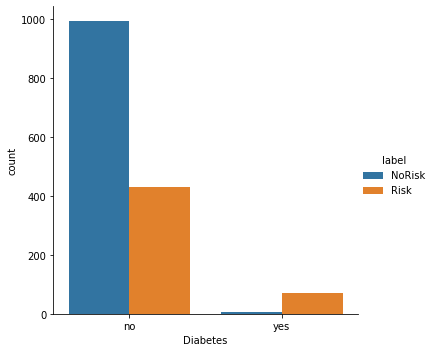

In [28]:
sns.catplot('Diabetes', data=cleaned_df, kind='count', hue='label')

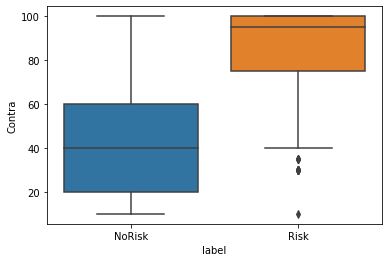

In [29]:
sns.boxplot(x=cleaned_df['label'], data=cleaned_df,  y=cleaned_df['Contra'])

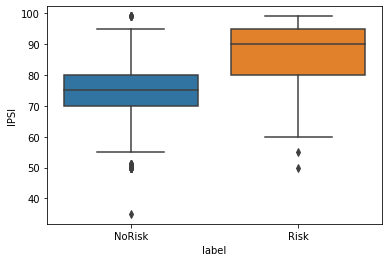

In [30]:
sns.boxplot(x=cleaned_df['label'], y=cleaned_df['IPSI'])

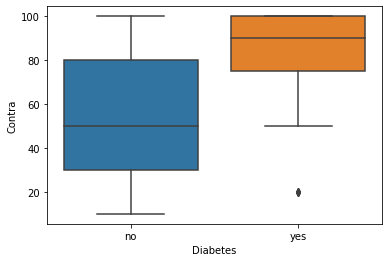

In [31]:
sns.boxplot(x=cleaned_df['Diabetes'], y=cleaned_df['Contra'])

In [32]:
cleaned_df.head()

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,label,Contra
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,NoRisk,20.0
1,0.602437,159284,TIA,no,no,no,no,no,70.0,NoRisk,60.0
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,Risk,40.0
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,Risk,85.0
4,0.676862,245829,CVA,no,no,no,no,no,70.0,NoRisk,20.0


In [33]:
cleaned_df.shape

(1500, 11)

In [34]:
cleaned_df.to_csv("cleaned_data", index=False)

# Data Preperation

In [35]:
preped_df = cleaned_df.copy()

In [36]:
preped_df.drop('Random', axis=1, inplace=True)
preped_df.drop('Id', axis=1, inplace=True)
preped_df.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,label,Contra
0,A-F,no,no,yes,no,no,78.0,NoRisk,20.0
1,TIA,no,no,no,no,no,70.0,NoRisk,60.0
2,A-F,no,yes,yes,no,no,95.0,Risk,40.0
3,TIA,no,no,yes,no,no,90.0,Risk,85.0
4,CVA,no,no,no,no,no,70.0,NoRisk,20.0


## Changing categorical attributes to numerical

In [37]:
preped_df.Indication = pd.Categorical(preped_df.Indication)
preped_df['n_indication'] = preped_df.Indication.cat.codes
preped_df.drop('Indication', axis=1, inplace=True)

preped_df.Diabetes = pd.Categorical(preped_df.Diabetes)
preped_df['n_diabetes'] = preped_df.Diabetes.cat.codes
preped_df.drop('Diabetes', axis=1, inplace=True)

preped_df.IHD = pd.Categorical(preped_df.IHD)
preped_df['n_ihd'] = preped_df.IHD.cat.codes
preped_df.drop('IHD', axis=1, inplace=True)

preped_df.Arrhythmia = pd.Categorical(preped_df.Arrhythmia)
preped_df['n_arrhythmia'] = preped_df.Arrhythmia.cat.codes
preped_df.drop('Arrhythmia', axis=1, inplace=True)

preped_df.History = pd.Categorical(preped_df.History)
preped_df['n_history'] = preped_df.History.cat.codes
preped_df.drop('History', axis=1, inplace=True)

preped_df.label = pd.Categorical(preped_df.label)
preped_df['n_label'] = preped_df.label.cat.codes
preped_df.drop('label', axis=1, inplace=True)

preped_df.Hypertension = pd.Categorical(preped_df.Hypertension)
preped_df['n_hypertension'] = preped_df.Hypertension.cat.codes
preped_df.drop('Hypertension', axis=1, inplace=True)

## One hot encoding of categorical data.

In [38]:
ohe = pd.get_dummies(preped_df['n_indication'], prefix="indication")
ohe.head()

preped_df.drop('n_indication', axis=1, inplace=True)
preped_df = pd.concat([preped_df, ohe], sort=False, axis=1)

In [39]:
preped_df.head()

,IPSI,Contra,n_diabetes,n_ihd,n_arrhythmia,n_history,n_label,n_hypertension,indication_0,indication_1,indication_2,indication_3
0,78.0,20.0,0,0,0,0,0,1,1,0,0,0
1,70.0,60.0,0,0,0,0,0,0,0,0,0,1
2,95.0,40.0,0,1,0,0,1,1,1,0,0,0
3,90.0,85.0,0,0,0,0,1,1,0,0,0,1
4,70.0,20.0,0,0,0,0,0,0,0,0,1,0


## Normalizing IPSI and CONTRA to [-1, 1]

In [40]:
from sklearn import preprocessing

x = preped_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
df = pd.DataFrame(min_max_scaler.fit_transform(preped_df), columns=preped_df.columns, index=preped_df.index)
df.head()

,IPSI,Contra,n_diabetes,n_ihd,n_arrhythmia,n_history,n_label,n_hypertension,indication_0,indication_1,indication_2,indication_3
0,0.671875,0.111111,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.546875,0.555556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.937500,0.333333,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,0.859375,0.833333,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.546875,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Train test split and converting to numpy arrays

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preped_df.drop('n_label', axis=1), 
                                                    preped_df['n_label'], 
                                                    test_size=0.3, 
                                                    random_state=69)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Modeling

## Decision Tree

In [42]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=42, min_samples_split=50, max_depth=2)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

## DT Eval

In [43]:
from sklearn.metrics import accuracy_score
print("Accuracy of the dt is: ", accuracy_score(y_test, y_pred))

Accuracy of the dt is:  0.8288888888888889


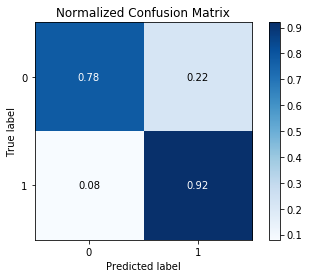

In [44]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

[Text(167.4, 181.2, 'X[4] <= 0.5\ngini = 0.438\nsamples = 1050\nvalue = [710, 340]'),
 Text(83.7, 108.72, 'X[1] <= 67.5\ngini = 0.264\nsamples = 831\nvalue = [701, 130]'),
 Text(41.85, 36.23999999999998, 'gini = 0.085\nsamples = 628\nvalue = [600, 28]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.5\nsamples = 203\nvalue = [101, 102]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 42.5\ngini = 0.079\nsamples = 219\nvalue = [9, 210]'),
 Text(209.25, 36.23999999999998, 'gini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(292.95, 36.23999999999998, 'gini = 0.019\nsamples = 206\nvalue = [2, 204]')]

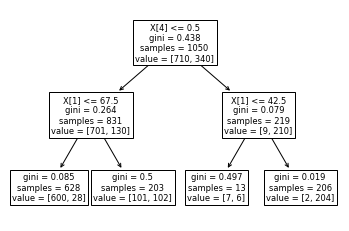

In [45]:
tree.plot_tree(clf.fit(X_train, y_train))

## Random Forests

In [46]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, min_samples_split=2, warm_start=True, random_state=42)
clf = clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)

## RF Eval

In [47]:
from sklearn.metrics import accuracy_score

print("classifier accuracy: ", accuracy_score(y_test, y_pred))

classifier accuracy:  0.9888888888888889


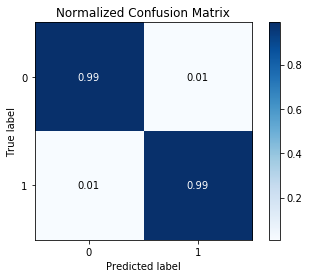

In [48]:
conf_mat = skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

## Multi Layer Perceptron

In [49]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=42, alpha=0.0002, learning_rate='adaptive', epsilon=2e-8)
clf = clf.fit(X_train, y_train.ravel())
y_pred = clf.predict(X_test)

c:\users\danny\env\lala\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## MLP Eval

In [50]:
from sklearn.metrics import accuracy_score

print("classifier accuracy: ", accuracy_score(y_test, y_pred))

classifier accuracy:  0.9377777777777778


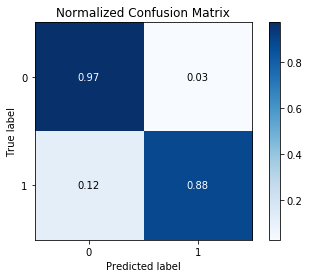

In [51]:
conf_mat = skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)